In [2]:
from pylab import *
%matplotlib inline

Los argumentos son una cosa que podemos agregar para poner más cosas en una función

Vamos a trabajar con RK de cuarto órden

In [3]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1): 
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h) 
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h) 
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h) 
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
    else:
        for i in xrange(len(tiempos)-1): 
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args) 
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args) 
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args) 
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
    return tiempos,sol

Vamos a programar las ecuaciones diferenciales que corresponden a una pelota que va cayendo... Estas son: 

$$
m\ddot{\vec{a}} = -g \hat{j} -f\dot{\hat{x}}
$$

con 
$$ \dot{\vec{x}}=u \\\\\\\\ \dot{\vec{u}}=-\frac{g}{m} \hat{j} -\frac{f}{m}\hat{u}
$$

Entonces los modelos de fricción, por ejemplo pueden ser: 

$$ f_1 \varpropto \dot{\vec{x}} \\\\\\\\\ f_2 \varpropto  \vert\dot{\vec{x}}\vert^2 
$$

Y entonces, las $f's$ serán: 

$$ f_1 = \gamma \vert \vec{u} \vert  \\\\\\\\\ f_2 = \mu \vert\vec{u}\vert^2
$$

In [4]:
def e_mov(r_v,t,fric=0,g=9.8,m=1):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2] #porque r_v es una lista que trae las condiciones iniviales...r_v=[x,y,vx,vy] y esto se comporta como [0,1,2,3]
    dy = r_v[3]
    
    if fric==0:
        dvx,dvy = 0, -(g/m)
        #print "No use un modelo de friccion"
        
    else:
        dvx = -  fric([r_v[2],r_v[3]])[0] #nuestro modelo de fricción sólo depende de la velocidad 
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    
    return array([dx,dy,dvx,dvy])

Aquí vamos a definir nuestros modelos de fricción:

In [5]:
#def fric_id(v): #nos sirve para ver si sí jala como la "ideal"
  #  return array([0,0])

def fric_v(v,gamma=0.1): #proporcional a la velocidad
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1): #proporcional al cuadrado de la verlocidad
        norm_v = sqrt(v[0]**2 + v[1]**2)
        f_x = gamma*norm_v*v[0]
        f_y = gamma*norm_v*v[1]
        return array([f_x,f_y])

Aquí va a tomar el valor de fric como cero a menos que yo le de otro valor en mis condiciones iniciales :)

In [6]:
print e_mov([1,1,1,1],1)
print e_mov([1,1,1,1],1,fric_v)
print e_mov([1,1,1,1],1,fric_v2)

[ 1.   1.   0.  -9.8]
[ 1.   1.  -0.1 -9.9]
[ 1.          1.         -0.14142136 -9.94142136]


Ahora vamos a tratar con otras cosas jeje

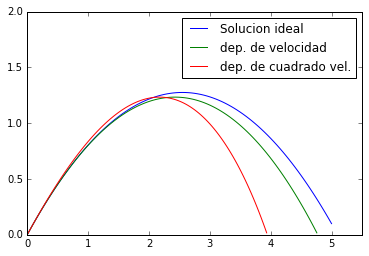

In [7]:
p = [0,0,5,5]
t,sol_id=rk4(e_mov,p,[0,1])
t,sol_fv=rk4(e_mov,p,[0,1],fric_v)
t,sol_fv2=rk4(e_mov,p,[0,1],fric_v2)
plot(sol_id[:,0],sol_id[:,1],label="Solucion ideal")
plot(sol_fv[:,0],sol_fv[:,1],label="dep. de velocidad")
plot(sol_fv2[:,0],sol_fv[:,1],label="dep. de cuadrado vel.")
xlim([0,5.5]),ylim([0,2])
legend()
show()

Y nuestro código no depende de nada en esta vida!!!!! que cool

In [ ]:
p = [0,0,5,5]
N = 500
trayectoria = zeros((N,len(p)))
mi_dt = .1
trayectoria[0,:] = array(p)
for i in range(N):
    t,sol_dt=rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    
    if sol_dt[-1,:][1] < 0:
        print "Buscando el punto de rebotao"
        dt_busqueda = mi_dt/2
        y_izq = trayectoria[i,:]
        t,sol = rk4(e_mov,trayectoria[i,:],[0,dt_busqueda],fric_v)
        y_med = sol[-1,:]
        while abs(y_izq[1]) > 1e-5:
            if y_izq[1]*y_med[1] < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(e_mov,reinicio,[0,dt_busqueda],fric_v)
            y_izq = reinicio
            y_med = sol[-1,:]
        break
    trayectoria[i+1,:] = sol_dt[-1,:]

plot(trayectoria[:,0],trayectoria[:,1],'o',label="la cosa")
plot(sol_fv[:,0],sol_fv[:,1],'x',label="dep. vel")
legend()
show()

Buscando el punto de rebotao


In [16]:
print sol_fv2[80,:][1]
print sol_fv2[-1,:][1]

0.486963819865
-0.311193109272


Buscando el punto de rebote :) Para esto vamos a necesitar el notebook del raices :)